# Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
years = [2015, 2016, 2017, 2018, 2019]
file_path = "/home/baran/Desktop/PythonProjeleri/worldHappinessReport/{}.csv"

combined_data = []

for year in years:
    # Create the file path and read the CSV file
    file_path_year = file_path.format(year)
    df = pd.read_csv(file_path_year)

    df["year"] = year

    combined_data.append(df)

# Concatenate all dataframes
combined_df = pd.concat(combined_data, ignore_index=True)

# Save the combined data to a new CSV file
combined_df.to_csv("combined_data.csv", index=False)

In [5]:
pd.set_option('display.max_columns', 30)
combined_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21700,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411
778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27600,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147
779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15800,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23500,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.035


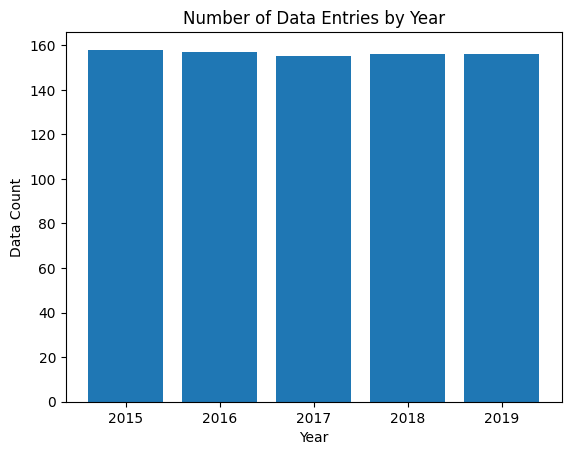

In [6]:
data_counts = combined_df["year"].value_counts()

# Bar plot
plt.bar(data_counts.index, data_counts.values)
plt.title("Number of Data Entries by Year")
plt.xlabel("Year")
plt.ylabel("Data Count")
plt.show()

In [8]:
# Check for missing values
missing_value_count = combined_df.isnull().sum()
print(missing_value_count)

Country                          312
Region                           467
Happiness Rank                   312
Happiness Score                  312
Standard Error                   624
Economy (GDP per Capita)         467
Family                           312
Health (Life Expectancy)         467
Freedom                          312
Trust (Government Corruption)    467
Generosity                         0
Dystopia Residual                467
year                               0
Lower Confidence Interval        625
Upper Confidence Interval        625
Whisker.high                     627
Whisker.low                      627
Economy..GDP.per.Capita.         627
Health..Life.Expectancy.         627
Trust..Government.Corruption.    627
Dystopia.Residual                627
Overall rank                     470
Country or region                470
Score                            470
GDP per capita                   470
Social support                   470
Healthy life expectancy          470
F

In [9]:
combined_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Overall rank',
       'Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Perceptions of corruption'],
      dtype='object')

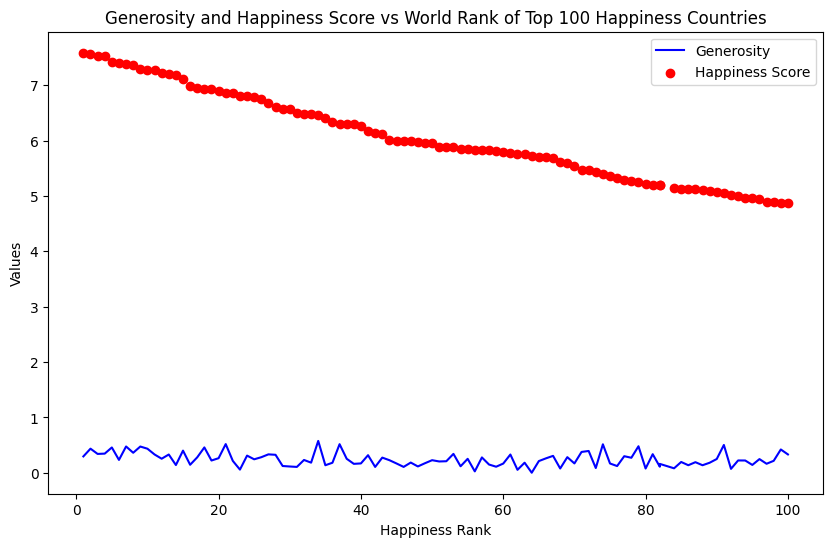

In [10]:
# First 100 rows
graph_df = combined_df.head(100)
# Plot for line graph
plt.figure(figsize=(10, 6))
# Plot Generosity data
plt.plot(graph_df['Happiness Rank'], graph_df['Generosity'], label='Generosity', color='blue')
# Plot Happiness Score data with points
plt.scatter(graph_df['Happiness Rank'], graph_df['Happiness Score'], label='Happiness Score', color='red', marker='o')

plt.title('Generosity and Happiness Score vs World Rank of Top 100 Happiness Countries')
plt.xlabel('Happiness Rank')
plt.ylabel('Values')
plt.legend()
plt.show()

# Which countries or regions are ranked highest in overall happiness and each of the six contributing factors to happiness?

## For Country

In [11]:
countries = combined_df['Country'].unique()

In [12]:
# Get overall happiness and six factor values for each country or region
ranking = {} # Create a dictionary to hold the countries with the highest values for each factor.

for country_region in countries:
    country_region_data = combined_df[combined_df['Country'] == country_region]

    # Get the overall happiness score
    happiness_score = country_region_data['Happiness Score'].mean()

    # Get the six factor values
    economy = country_region_data['Economy (GDP per Capita)'].mean()
    family = country_region_data['Family'].mean()
    health = country_region_data['Health (Life Expectancy)'].mean()
    freedom = country_region_data['Freedom'].mean()
    trust = country_region_data['Trust (Government Corruption)'].mean()
    generosity = country_region_data['Generosity'].mean()

    # Store the factors in a dictionary
    ranking[country_region] = {
        'Happiness Score': happiness_score,
        'Economy': economy,
        'Family': family,
        'Health': health,
        'Freedom': freedom,
        'Trust': trust,
        'Generosity': generosity
    }

In [13]:
# Convert the dictionary to a DataFrame
ranking_df = pd.DataFrame.from_dict(ranking, orient='index')
# Sort by overall happiness level and show the top 10 values.
top_happiness_countries = ranking_df.sort_values(by='Happiness Score', ascending=False).head(20)
top_happiness_countries

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity
Switzerland,7.530000,1.461920,1.337221,0.902230,0.623737,0.415905,0.289386
Denmark,7.525000,1.383630,1.358481,0.834840,0.618266,0.464050,0.352793
Iceland,7.522000,1.364490,1.398688,0.907585,0.607391,0.145600,0.462873
Norway,7.519000,1.518220,1.330458,0.840500,0.633748,0.361395,0.362651
Finland,7.429333,1.348115,1.331049,0.850010,0.610227,0.411880,0.244638
Canada,7.382333,1.383220,1.300020,0.866615,0.605924,0.321430,0.447330
Netherlands,7.364667,1.397060,1.246076,0.852575,0.584418,0.308705,0.473583
Sweden,7.313000,1.391760,1.284957,0.871040,0.618301,0.423555,0.376853
New Zealand,7.311333,1.305420,1.346882,0.869665,0.611637,0.424130,0.489675
Australia,7.293667,1.389005,1.308011,0.891380,0.607072,0.339840,0.462463


## For Region

In [15]:
regions = combined_df['Region'].unique()

In [16]:
# Get overall happiness and six factor values for each country or region
ranking = {} # Create a dictionary to hold the countries with the highest values for each factor.

for country_region in regions:
    country_region_data = combined_df[combined_df['Region'] == country_region]

    # Get the overall happiness score
    happiness_score = country_region_data['Happiness Score'].mean()

    # Get the six factor values
    economy = country_region_data['Economy (GDP per Capita)'].mean()
    family = country_region_data['Family'].mean()
    health = country_region_data['Health (Life Expectancy)'].mean()
    freedom = country_region_data['Freedom'].mean()
    trust = country_region_data['Trust (Government Corruption)'].mean()
    generosity = country_region_data['Generosity'].mean()

    # Store the factors in a dictionary
    ranking[country_region] = {
        'Happiness Score': happiness_score,
        'Economy': economy,
        'Family': family,
        'Health': health,
        'Freedom': freedom,
        'Trust': trust,
        'Generosity': generosity
    }

In [17]:
# Convert the dictionary to a DataFrame
ranking_df = pd.DataFrame.from_dict(ranking, orient='index')
# Sort by overall happiness level and show the top 10 values.
top_happiness_regions = ranking_df.sort_values(by='Happiness Score', ascending=False).head(20)
top_happiness_regions

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity
Australia and New Zealand,7.304250,1.347212,1.226610,0.880522,0.610115,0.381985,0.469678
North America,7.263500,1.417227,1.178410,0.843505,0.558585,0.237610,0.429568
Western Europe,6.687643,1.357826,1.144877,0.867451,0.513757,0.232004,0.303412
Latin America and Caribbean,6.122283,0.937647,0.997092,0.656305,0.462560,0.111352,0.212905
Eastern Asia,5.625167,1.214546,1.004927,0.842034,0.424886,0.123021,0.224724
Middle East and Northern Africa,5.396744,1.102221,0.810950,0.662170,0.336426,0.171873,0.188609
Central and Eastern Europe,5.351810,0.994988,0.957449,0.675183,0.329398,0.087373,0.161581
Southeastern Asia,5.328167,0.842718,0.866112,0.619363,0.523614,0.149690,0.432706
Southern Asia,4.572071,0.610579,0.563008,0.497250,0.361681,0.103717,0.342355
Sub-Saharan Africa,4.170462,0.426194,0.704132,0.261646,0.341332,0.122173,0.223676


# How did country rankings or scores change between 2015-2016 and 2016-2017 reports?

In [18]:
df = pd.read_csv("combined_data.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21700,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411
778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27600,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147
779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15800,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23500,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.035


In [19]:
# Split the data by years.
year_2015 = pd.read_csv("2015.csv")
year_2016 = pd.read_csv("2016.csv")
year_2017 = pd.read_csv("2017.csv")

In [21]:
# Perform a merge operation to find common countries.
common_countries_2015_16 = year_2015.merge(year_2016, on="Country", suffixes=("_rank_2015", "_rank_2016"))
common_countries_2015_16["Score_Change"] = common_countries_2015_16["Happiness Score_rank_2016"] - common_countries_2015_16["Happiness Score_rank_2015"]
common_countries_2015_16["Rank_Change"] = common_countries_2015_16["Happiness Rank_rank_2016"] - common_countries_2015_16["Happiness Rank_rank_2015"]
common_countries_2015_16 = common_countries_2015_16.rename(columns={"Happiness Rank_rank_2016": "Happiness Rank_2016", "Happiness Rank_rank_2015": "Happiness Rank_2015",
                                                                    "Happiness Score_rank_2016": "Happiness Score_2016", "Happiness Score_rank_2015": "Happiness Score_2015"})
print("2015-2016 Changes:")
common_countries_2015_16

2015-2016 Changes:


,Country,Region_rank_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita)_rank_2015,Family_rank_2015,Health (Life Expectancy)_rank_2015,Freedom_rank_2015,Trust (Government Corruption)_rank_2015,Generosity_rank_2015,Dystopia Residual_rank_2015,Region_rank_2016,Happiness Rank_2016,Happiness Score_2016,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita)_rank_2016,Family_rank_2016,Health (Life Expectancy)_rank_2016,Freedom_rank_2016,Trust (Government Corruption)_rank_2016,Generosity_rank_2016,Dystopia Residual_rank_2016,Score_Change,Rank_Change
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,-0.078,1
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,-0.060,1
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,-0.001,-2
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,-0.024,0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,-0.023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,0.050,-2
147,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,0.144,-2
148,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,0.063,0
149,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,0.000,0


In [22]:
# Perform a merge operation to find common countries.
common_countries_2016_2017 = year_2016.merge(year_2017, on="Country", suffixes=("_rank_2016", "_rank_2017"))
common_countries_2016_2017["Score_Change"] = common_countries_2016_2017["Happiness Score_rank_2017"] - common_countries_2016_2017["Happiness Score_rank_2016"]
common_countries_2016_2017["Rank_Change"] = common_countries_2016_2017["Happiness Rank_rank_2017"] - common_countries_2016_2017["Happiness Rank_rank_2016"]
common_countries_2016_2017 = common_countries_2016_2017.rename(columns={"Happiness Rank_rank_2017": "Happiness Rank_2017", "Happiness Rank_rank_2016": "Happiness Rank_2016",
                                                                        "Happiness Score_rank_2017": "Happiness Score_2017", "Happiness Score_rank_2016": "Happiness Score_2016"})

print("\n2016-2017 Changes:")
common_countries_2016_2017


2016-2017 Changes:


,Country,Region,Happiness Rank_2016,Happiness Score_2016,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family_rank_2016,Health (Life Expectancy),Freedom_rank_2016,Trust (Government Corruption),Generosity_rank_2016,Dystopia Residual,Happiness Rank_2017,Happiness Score_2017,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family_rank_2017,Health..Life.Expectancy.,Freedom_rank_2017,Generosity_rank_2017,Trust..Government.Corruption.,Dystopia.Residual,Score_Change,Rank_Change
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,-4.000164e-03,1
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,-1.500004e-02,2
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,3.000187e-03,0
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,3.900018e-02,-3
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,5.599986e-02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,143,3.657,3.745784,3.568217,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,1.885631,1.730001e-01,-10
146,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,4.339999e-01,-13
147,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,1.919999e-01,-5
148,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,3.929999e-01,-4


# Has any country experienced a significant increase or decrease in happiness?

In [25]:
# First, let's check the mean and median of the changes. Then label values that are 1.5 IQR above or below as "significant_increase" or "significant_decrease".
print("Average happiness score change in 2015-2016:", common_countries_2015_16["Score_Change"].mean())
print("Median happiness rank change in 2015-2016:", common_countries_2015_16["Rank_Change"].median())
print("Average happiness score change in 2016-2017:", common_countries_2016_2017["Score_Change"].mean())
print("Median happiness rank change in 2016-2017:", common_countries_2016_2017["Rank_Change"].median())

Average happiness score change in 2015-2016: -0.01038410596026489
Median happiness rank change in 2015-2016: 0.0
Average happiness score change in 2016-2017: 0.006393331565856822
Median happiness rank change in 2016-2017: -2.0


# Z-Score for Anomaly Detection
Anomaly detection is a common problem in data science. One common approach to anomaly detection is to use the Z-Score. The Z-Score is a measure of how far a data point is from the mean of the data set. A data point with a Z-Score that is greater than or less than a certain threshold can be considered an anomaly.

The Z-Score is calculated using the following formula:

Z = (x - μ) / σ
where:

x is the value itself
μ is the mean of the data set
σ is the standard deviation of the data set

In [30]:
mean_2015_16 = common_countries_2015_16["Score_Change"].mean()
std_2015_16 = common_countries_2015_16["Score_Change"].std()

mean_2016_17 = common_countries_2016_2017["Score_Change"].mean()
std_2016_17 = common_countries_2016_2017["Score_Change"].std()

threshold = 2.5

# Anomaly detection for 2015-2016
anomalous_countries_2015_16 = common_countries_2015_16[common_countries_2015_16["Score_Change"].abs() > threshold * std_2015_16]

# Anomaly detection for 2016-2017
anomalous_countries_2016_17 = common_countries_2016_2017[common_countries_2016_2017["Score_Change"].abs() > threshold * std_2016_17]

In [31]:
anomalous_countries_2015_16

,Country,Region_rank_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita)_rank_2015,Family_rank_2015,Health (Life Expectancy)_rank_2015,Freedom_rank_2015,Trust (Government Corruption)_rank_2015,Generosity_rank_2015,Dystopia Residual_rank_2015,Region_rank_2016,Happiness Rank_2016,Happiness Score_2016,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita)_rank_2016,Family_rank_2016,Health (Life Expectancy)_rank_2016,Freedom_rank_2016,Trust (Government Corruption)_rank_2016,Generosity_rank_2016,Dystopia Residual_rank_2016,Score_Change,Rank_Change
21,Venezuela,Latin America and Caribbean,23,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131,Latin America and Caribbean,44,6.084,5.973,6.195,1.13367,1.03302,0.61904,0.19847,0.08304,0.04250,2.97468,-0.726,21
66,Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,Middle East and Northern Africa,38,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,0.750,-30
110,Liberia,Sub-Saharan Africa,116,4.571,0.11068,0.07120,0.78968,0.34201,0.28531,0.06232,0.24362,2.77729,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284,-0.949,34


In [33]:
anomalous_countries_2016_17

,Country,Region,Happiness Rank_2016,Happiness Score_2016,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family_rank_2016,Health (Life Expectancy),Freedom_rank_2016,Trust (Government Corruption),Generosity_rank_2016,Dystopia Residual,Happiness Rank_2017,Happiness Score_2017,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family_rank_2017,Health..Life.Expectancy.,Freedom_rank_2017,Generosity_rank_2017,Trust..Government.Corruption.,Dystopia.Residual,Score_Change,Rank_Change
35,Algeria,Middle East and Northern Africa,38,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,53,5.872,5.978286,5.765714,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,-0.483,15
40,Venezuela,Latin America and Caribbean,44,6.084,5.973,6.195,1.13367,1.03302,0.61904,0.19847,0.08304,0.04250,2.97468,82,5.250,5.370032,5.129968,1.128431,1.431338,0.617144,0.153997,0.065020,0.064491,1.789464,-0.834,38
122,Bulgaria,Central and Eastern Europe,129,4.217,4.104,4.330,1.11306,0.92542,0.67806,0.21219,0.00615,0.12793,1.15377,105,4.714,4.803695,4.624306,1.161459,1.434379,0.708218,0.289232,0.113178,0.011052,0.996139,0.497,-24
